In [10]:
from f_measurents import *

In [11]:
# Config
import config
import os
landmarks = config.landmarks
top_to_bottom_angle_ref = config.top_to_bottom_angle_ref
top_to_bottom_angle_max_deviation = config.top_to_bottom_angle_max_deviation
left_to_right_angle_ref = config.left_to_right_angle_ref
left_to_right_angle_max_deviation_perc = config.left_to_right_angle_max_deviation_perc
area_ratio_right_to_left_max_deviation_perc = config.area_ratio_right_to_left_max_deviation_perc
area_ratio_right_to_left_ref = config.area_ratio_right_to_left_ref
# 
interactive_plot = True

# Static Image

In [12]:
image_path = os.getcwd() + '/input/priyam.jpeg'
image_path


'/Users/danielfiuzadosil/Documents/GitHub_Repo/IPD_measuring_app/input/priyam.jpeg'

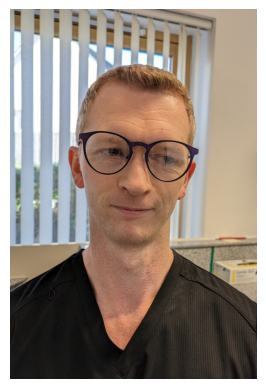

In [13]:
image = cv2.imread(image_path)
plt.axis('off')
plt.imshow(image_rgb_to_bgr(image))

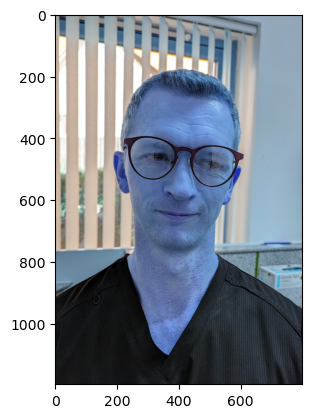

In [14]:
height, width = height_width_image(image)
image_measured, ipd_px, width_face_px, height_face_px, top_to_bottom_angle, left_to_right_angle, left_cheek_to_nose_angle, nose_to_right_cheek_angle, area_px_left_silhoutte, area_px_right_silhoutte, area_right_to_left_silhoutte = measure_image(image, landmarks)
plt.imshow(image_bgr_to_rgb(image_measured))
plt.imshow(image_rgb_to_bgr(image_measured))
filepath = 'photos/output/test.pdf'
plt.savefig(filepath,transparent=True,bbox_inches='tight')

In [15]:
print(ipd_px, width_face_px, height_face_px, top_to_bottom_angle, left_to_right_angle, left_cheek_to_nose_angle, nose_to_right_cheek_angle, area_px_left_silhoutte, area_px_right_silhoutte, area_right_to_left_silhoutte)

nan nan nan nan nan nan nan nan nan nan


In [16]:
image = image_bgr_to_rgb(image)
# Properties of lines
global font_scale, font_thickness, line_width, point_width, thickness_oval, x_position_0, y_position_v
n_lines = 5
scale = 1
height, width = height_width_image(image)
font_scale, font_thickness, line_width, point_width, thickness_oval, x_position_0, y_position_v = put_text_args(height, width, n_lines, scale)
print(point_width)
# Getting face lanmarks + iris position
result, mesh_points = face_mesh_points(image)
iris_position, iris_radius = find_iris_location(mesh_points,landmarks)
# Measuring properties
ipd_px = get_ipd_px(iris_position)
width_face_px, height_face_px = get_face_dimensions_px(mesh_points, landmarks)
    # distance_camera_to_face = distance_camera_to_face_calculator(focal_length, real_face_width, width_face_px)
top_to_bottom_angle = get_top_to_bottom_angle(mesh_points, landmarks)
left_to_right_angle = get_left_to_right_angle(mesh_points, landmarks)
left_cheek_to_nose_angle = get_left_cheek_to_nose_angle(mesh_points, landmarks)
nose_to_right_cheek_angle = get_nose_to_right_cheek_angle(mesh_points, landmarks)
area_px_left_silhoutte = area_px_left_silhoutte_calc(mesh_points, landmarks)
area_px_right_silhoutte = area_px_right_silhoutte_calc(mesh_points, landmarks)
area_right_to_left_silhoutte = (1 - (area_px_right_silhoutte/area_px_left_silhoutte))*100
# Printing objects
image = print_face_mesh_image(image, result)
image = print_iris_location(image, mesh_points, landmarks)
image = print_center_iris(image, iris_position)
image = print_line_left_to_right_iris(image, iris_position)
image = print_line_top_to_bottom(image, mesh_points, landmarks)
image = print_line_left_to_right(image, mesh_points, landmarks)
image = print_line_left_cheek_to_nose(image, mesh_points, landmarks)
image = print_line_nose_to_right_cheek(image, mesh_points, landmarks)
image = print_silhouette(image, mesh_points, landmarks)
image = print_rectangle_card_area(image, mesh_points, landmarks)
image = print_right_silhouette(image, mesh_points, landmarks)
image = print_left_silhouette(image, mesh_points, landmarks)
image = print_face_oval(image)
# Screenprinting data and checks
# 
image = screenprint_top_to_bottom_angle(image, top_to_bottom_angle, top_to_bottom_angle_ref, top_to_bottom_angle_max_deviation)
image = screenprint_left_to_right_angle(image, left_to_right_angle, left_to_right_angle_ref, left_to_right_angle_max_deviation_perc)
image = screenprint_area_right_to_left_silhoutte(image, area_right_to_left_silhoutte, area_ratio_right_to_left_ref, area_ratio_right_to_left_max_deviation_perc)
image = screenprint_ipd_px(image, ipd_px)
image = screenprint_nose_to_cheek(image,left_cheek_to_nose_angle,nose_to_right_cheek_angle)

1


In [19]:
print(top_to_bottom_angle, left_to_right_angle, left_cheek_to_nose_angle, nose_to_right_cheek_angle, area_right_to_left_silhoutte)

-83.58459724515893 6.916289478042527 11.915147071265027 1.7534048600715397 11.61722267113009


True

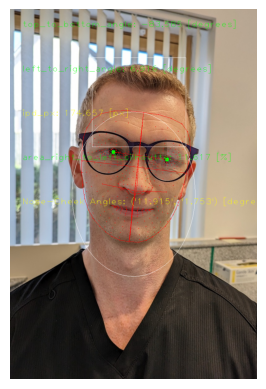

In [17]:
plt.axis('off')
plt.imshow(image)
cv2.imwrite('output/processing_image.jpg', image_rgb_to_bgr(image)) 